In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

import warnings
warnings.filterwarnings("ignore")

from zwad.ad.preprocess import load_dataset
from zwad.ad.postprocess import load_ad_tables_by_patterns

In [2]:
# Load M31 data

m31_oid, m31_features = load_dataset('../data/oid_m31.dat', '../data/feature_m31.dat', '../data/feature_m31.name')
m31 = pd.DataFrame(m31_features, index=m31_oid)

In [3]:
# Lead full expert list of anomalies with comments, indexed by anomalies oid

m31_maria_list = pd.read_csv('../data/m31_maria.csv')
m31_maria_list = m31_maria_list.set_index('oid')
m31_maria_list

,#,tag,tag_detailed,comments,alerts
oid,,,,,
695211400034403,0,artefact,bright star,bright star,NaN
695211400124577,1,artefact,bright star,bright star,NaN
695211400102351,2,artefact,bright star,bright star,NaN
695211400053697,3,artefact,bright star,bright star,NaN
695211200075348,4,transient,red star,"MASTER transient, red star; has spectra but st...",NaN
...,...,...,...,...,...
695211300007276,96,Cepheid,NaN,NaN,NaN
695211400066438,97,artefact,spaceship,spaceship,NaN
695211100015190,98,uncat,red star,Variable; red star,NaN


In [4]:
# From full data list (M31), only select oid that match those in expert anomalies list

m31_anom = m31.loc[m31_maria_list.index]
#m31_anom.to_csv('../data/m31_anomalies_table.csv')
m31_anom

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,0.118531,0.011458,0.861847,1.873147,28.882809,1568.272339,0.410859,1.097088,0.875042,16.457632
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,0.112881,0.019039,0.824700,0.893768,9.279490,1209.481201,0.397880,1.082259,0.903058,16.626255
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,0.144106,0.022466,0.992880,0.968951,8.050076,747.957153,0.321721,1.132575,0.900563,17.092886
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,0.182627,0.026980,1.074533,0.876942,4.537641,1371.101685,0.280188,0.917519,0.851317,16.688284
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,0.101488,0.048847,0.894277,2.820131,63.978363,12.322401,0.163349,0.557800,0.902715,20.001472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695211300007276,0.300000,0.432836,0.000000,0.295936,0.168231,2.354063e+08,0.388000,0.467501,-1.733258,-0.000418,...,0.127645,0.017317,0.875658,2.145854,65.896980,24.360680,0.173465,0.196964,0.934977,18.008938
695211400066438,1.752000,0.230769,0.057692,0.092180,1.919358,5.872233e+09,0.709999,2.071201,0.648592,0.002425,...,0.168247,0.026149,0.796572,0.745339,4.312061,51.682423,-1.130881,0.763402,0.892168,19.265198
695211100015190,0.981999,0.138211,0.081301,0.353806,0.233171,1.374187e+08,0.464251,0.811600,2.162920,0.005433,...,0.169431,0.049908,0.822073,1.333406,35.070377,4.851675,1.575419,0.429781,0.804553,19.868694


# Create final table with tag comments like artefact

In [5]:
# Combine features data in anomalies with associated comments/tags
m31_final_anom = pd.concat([m31_anom, m31_maria_list], axis=1)
#m31_final_anom.to_csv('../data/m31_anomalies_table_with_tags.csv')
m31_final_anom

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,chi2,skew,standard_deviation,stetson_K,weighted_mean,#,tag,tag_detailed,comments,alerts
oid,,,,,,,,,,,,,,,,,,,,,
695211400034403,2.380000,0.293706,0.048951,0.210137,1.039928,1.205708e+09,1.702999,2.813601,-0.436671,-0.000443,...,1568.272339,0.410859,1.097088,0.875042,16.457632,0,artefact,bright star,bright star,NaN
695211400124577,2.044500,0.358025,0.006173,0.203197,1.588497,2.624290e+09,1.459000,3.120001,-0.784893,-0.003234,...,1209.481201,0.397880,1.082259,0.903058,16.626255,1,artefact,bright star,bright star,NaN
695211400102351,2.362000,0.396694,0.024793,0.155299,1.549895,2.136628e+09,1.404751,3.065599,-0.579718,0.001458,...,747.957153,0.321721,1.132575,0.900563,17.092886,2,artefact,bright star,bright star,NaN
695211400053697,2.212500,0.310000,0.080000,0.229030,1.349776,4.898475e+08,1.032000,2.337502,0.153038,0.000263,...,1371.101685,0.280188,0.917519,0.851317,16.688284,3,artefact,bright star,bright star,NaN
695211200075348,1.108000,0.458333,0.013889,0.400897,0.117357,2.367448e+07,1.024000,1.484999,-1.029066,0.017021,...,12.322401,0.163349,0.557800,0.902715,20.001472,4,transient,red star,"MASTER transient, red star; has spectra but st...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695211300007276,0.300000,0.432836,0.000000,0.295936,0.168231,2.354063e+08,0.388000,0.467501,-1.733258,-0.000418,...,24.360680,0.173465,0.196964,0.934977,18.008938,96,Cepheid,NaN,NaN,NaN
695211400066438,1.752000,0.230769,0.057692,0.092180,1.919358,5.872233e+09,0.709999,2.071201,0.648592,0.002425,...,51.682423,-1.130881,0.763402,0.892168,19.265198,97,artefact,spaceship,spaceship,NaN
695211100015190,0.981999,0.138211,0.081301,0.353806,0.233171,1.374187e+08,0.464251,0.811600,2.162920,0.005433,...,4.851675,1.575419,0.429781,0.804553,19.868694,98,uncat,red star,Variable; red star,NaN


# LOOKING AT PHASE SPACES WITH EXPERT TAGS

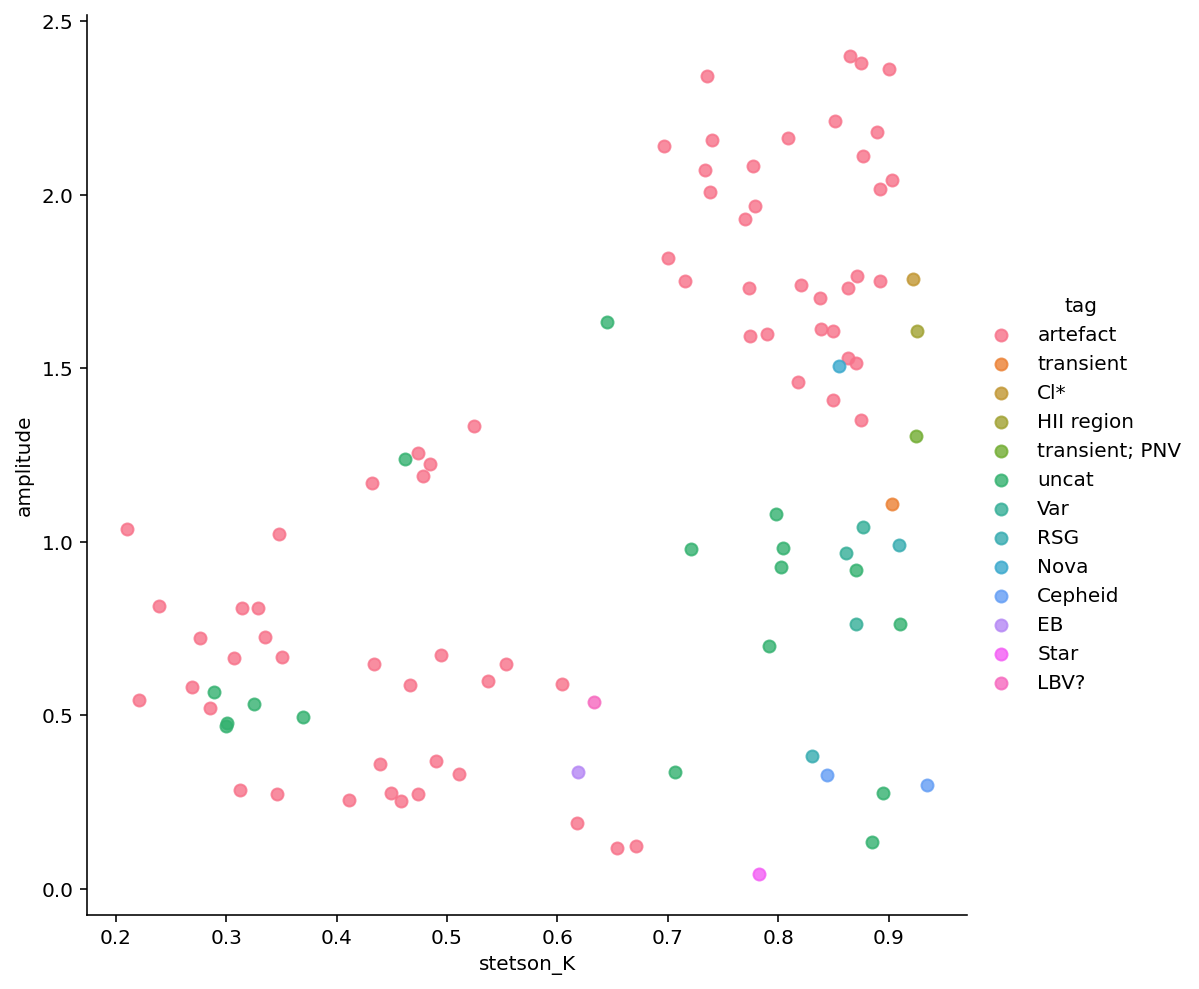

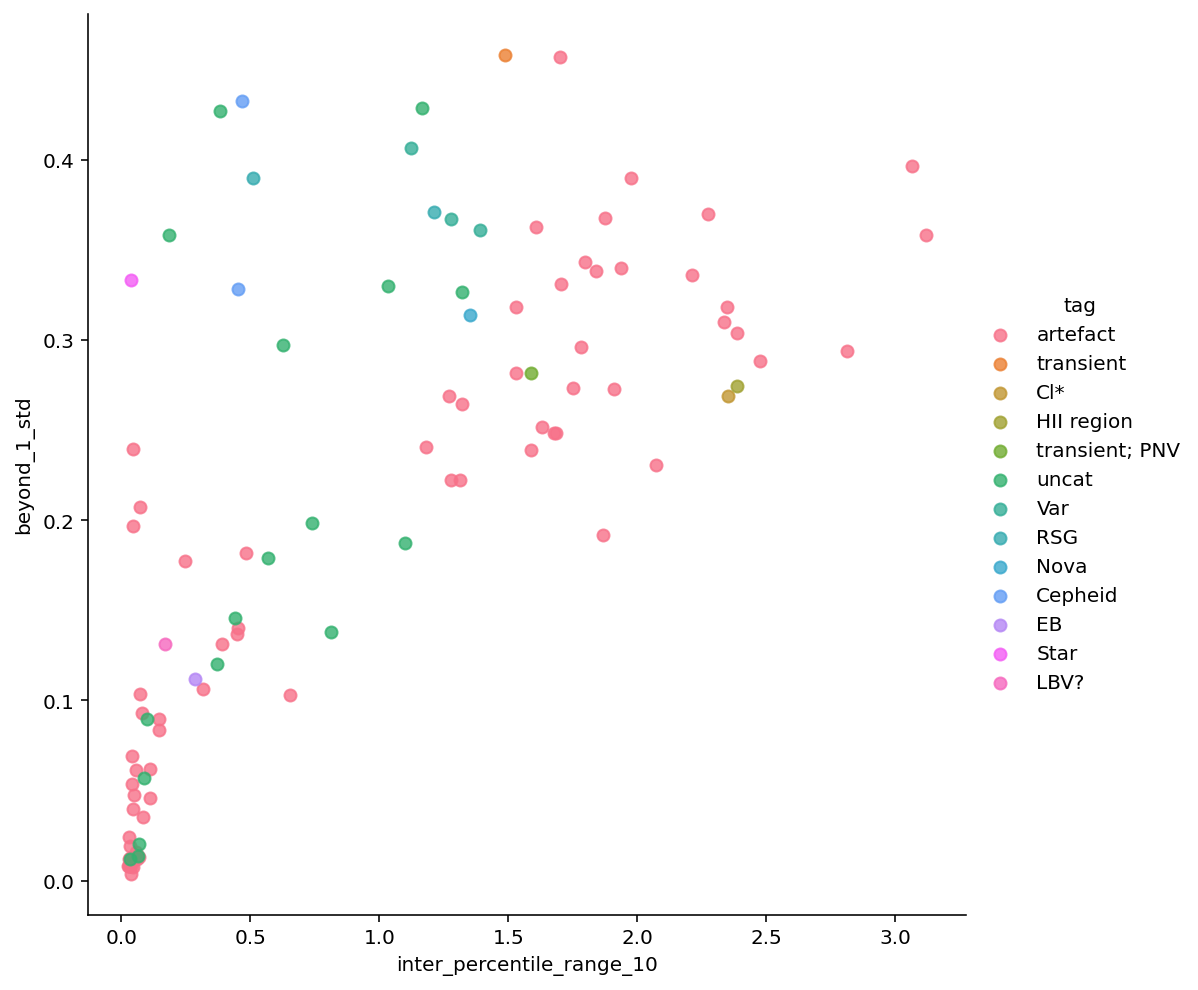

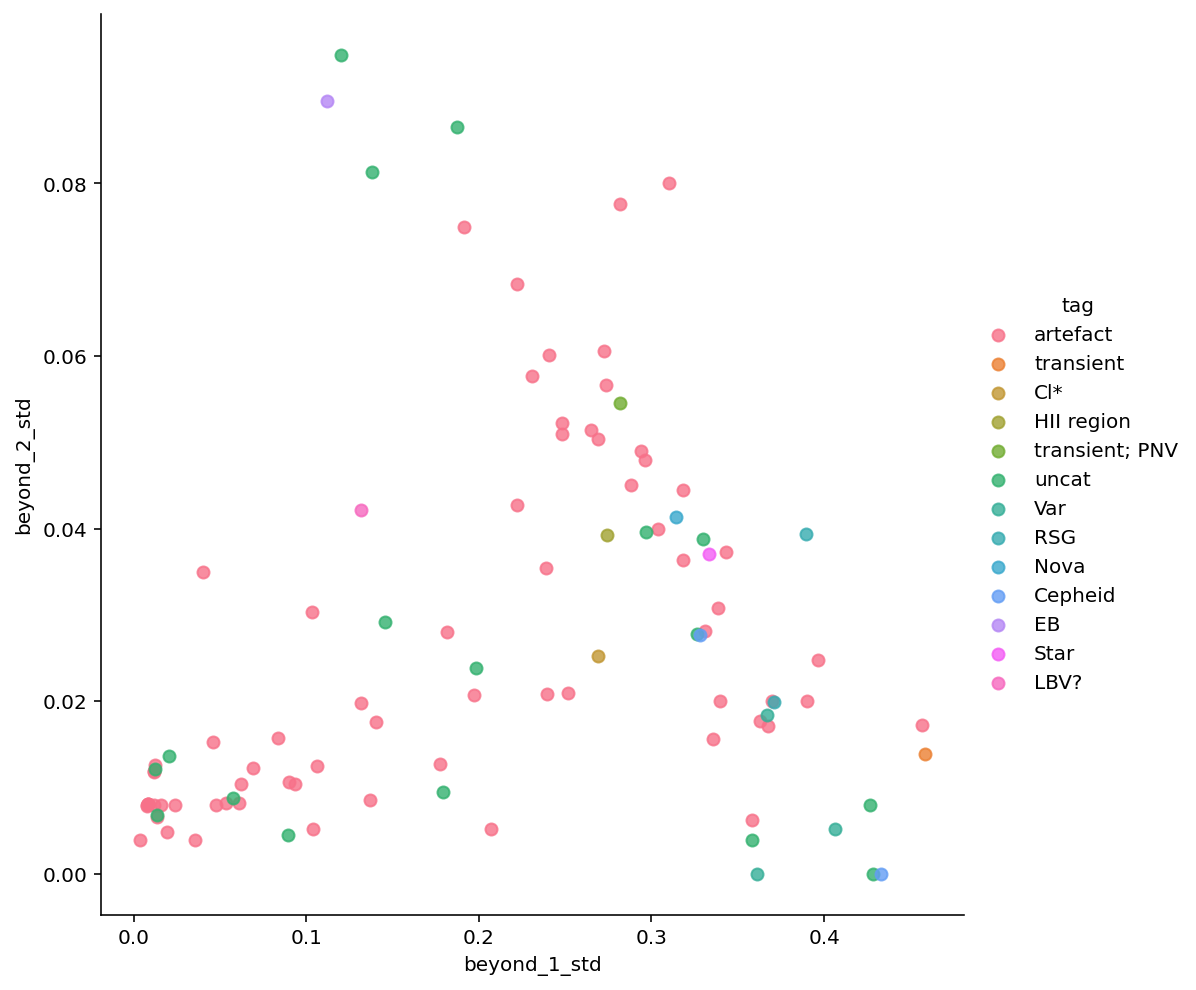

In [6]:
#plotting semi random phase spaces...

import seaborn as sns

df = m31_final_anom

rs = random.Random(42)  #set random seed to 42 to reproducibility

for i in m31_anom.columns[0:3]: #use col of data table with only features. Do only 3 columns for space
    
    f1 = rs.choice(m31_anom.columns)

    sns.lmplot(x='{}'.format(f1), y='{}'.format(i), data=df, fit_reg=False, hue='tag', legend=True,
          height=7)

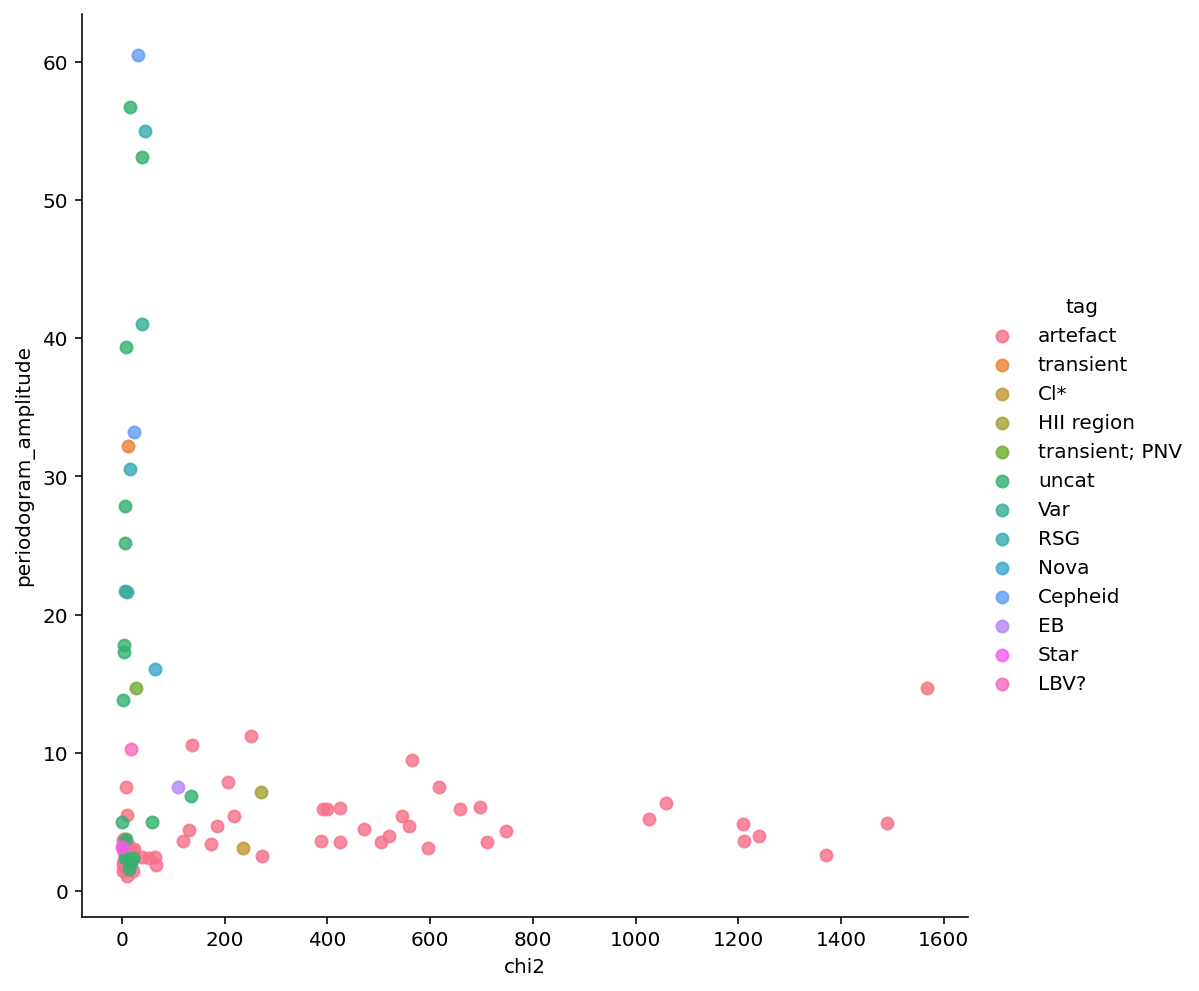

In [7]:
# a potentially decent phase space to use in paper

import seaborn as sns

df = m31_final_anom
 
sns.lmplot(x="chi2", y="periodogram_amplitude", data=df, fit_reg=False, hue='tag', legend=True,
          height=7)


#set plot params
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12

plt.savefig('../figs/phase_spaces/chi2_periodamp_phase_space_plot.png', format='png', dpi=300, bbox_inches='tight')

# Try simple Kmeans clustering on this phase space

In [8]:
periodo_amp_and_chi2 = pd.concat([m31_final_anom['chi2'], m31_final_anom['periodogram_amplitude']], axis=1)
periodo_amp_and_chi2

,chi2,periodogram_amplitude
oid,,
695211400034403,1568.272339,14.688282
695211400124577,1209.481201,4.901128
695211400102351,747.957153,4.331062
695211400053697,1371.101685,2.631295
695211200075348,12.322401,32.224648
...,...,...
695211300007276,24.360680,33.195518
695211400066438,51.682423,2.412696
695211100015190,4.851675,17.789490


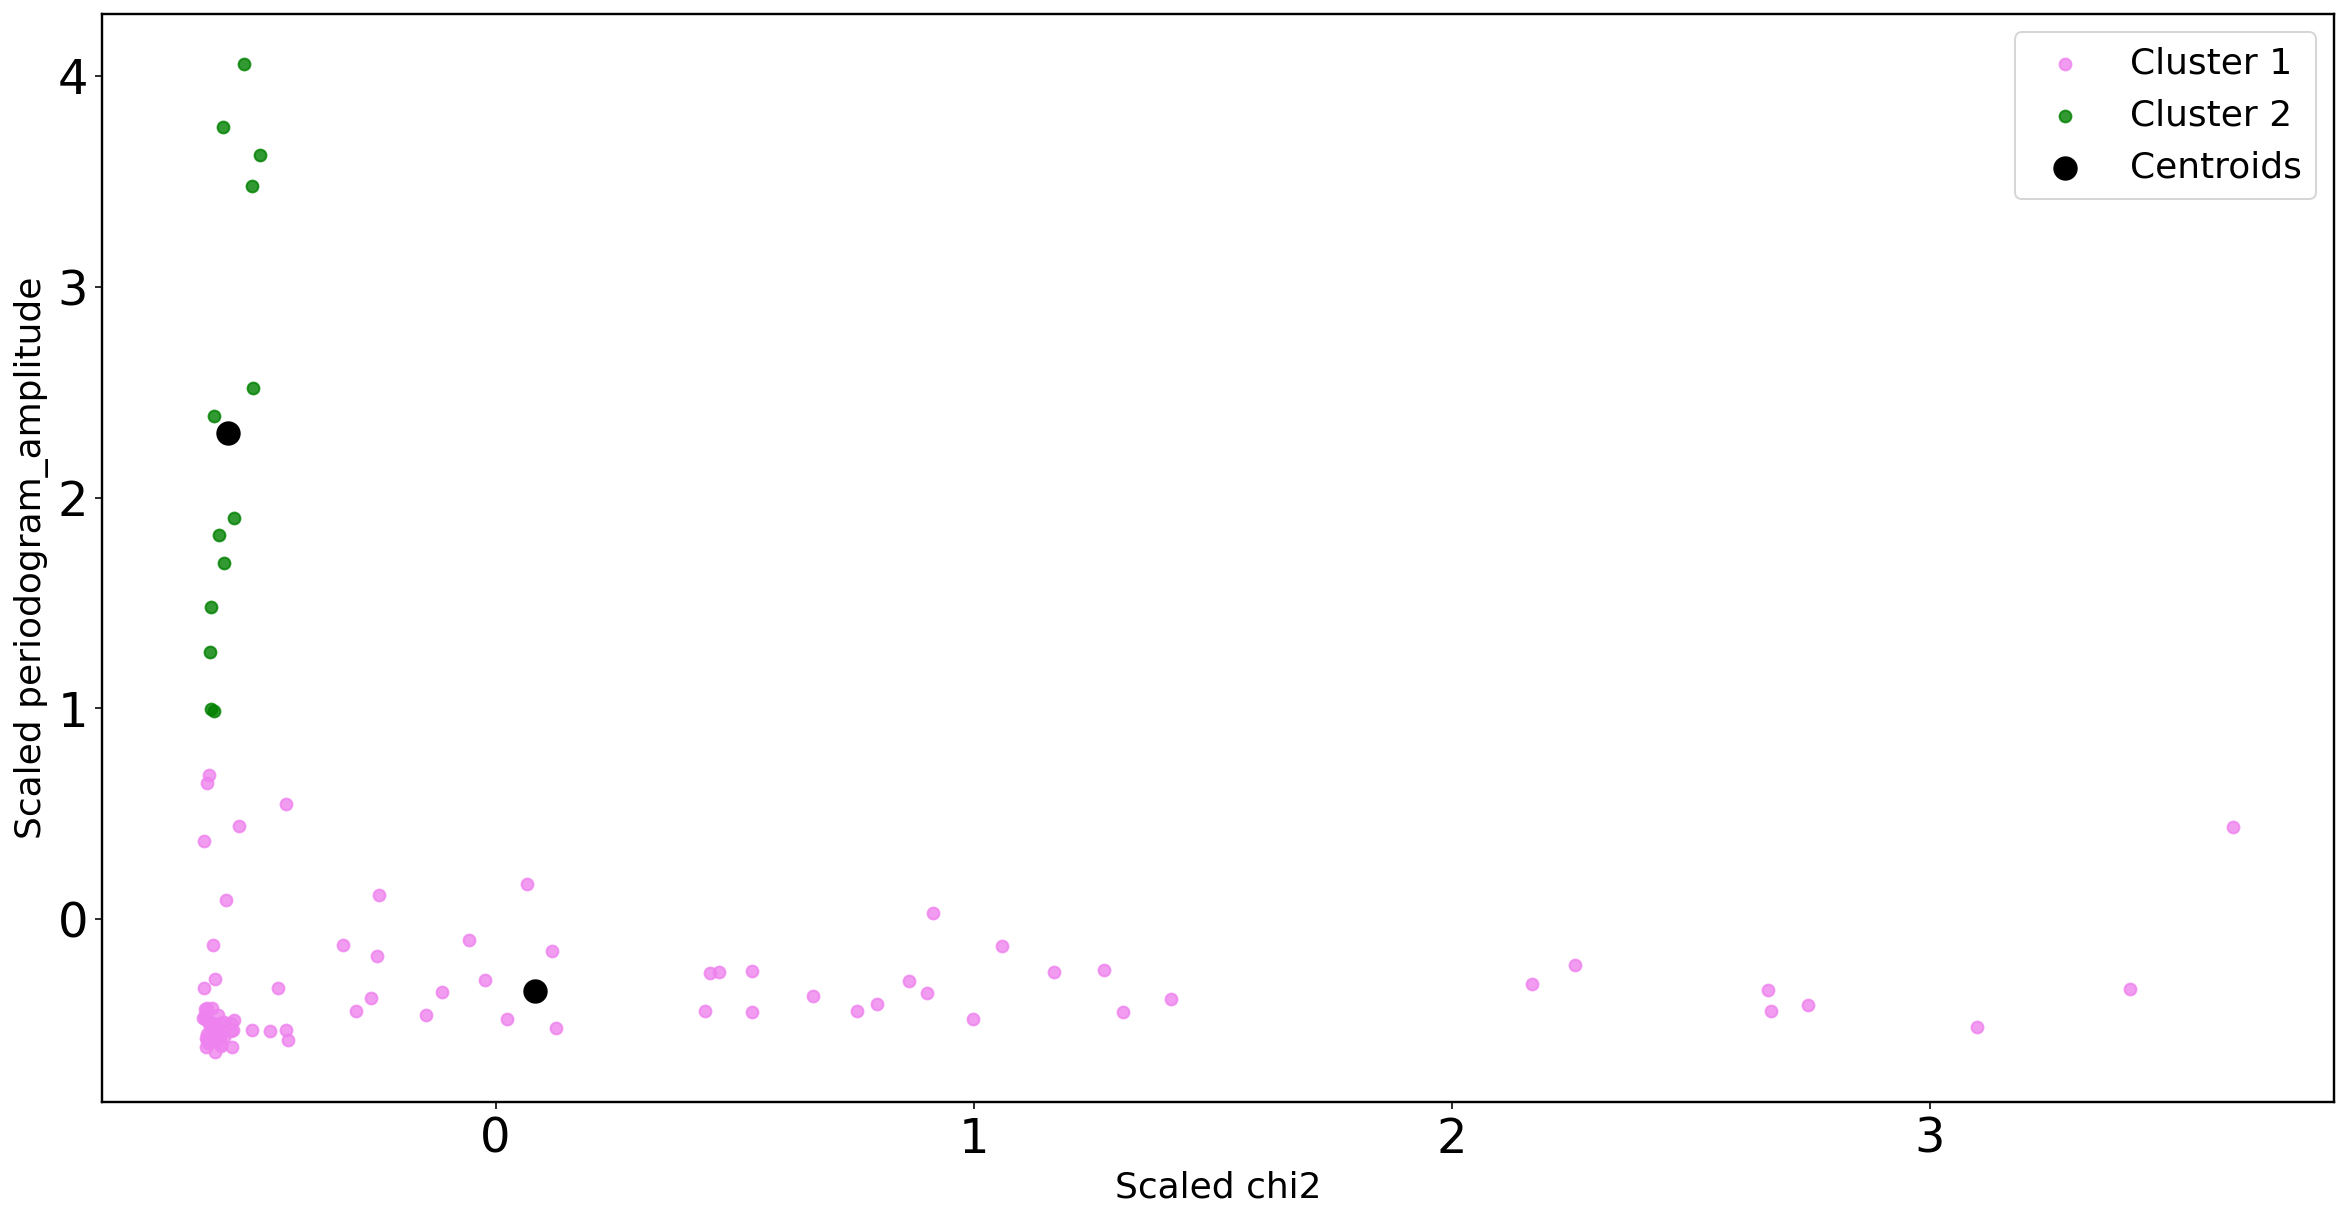

In [9]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fig, ax = plt.subplots(figsize=(20, 10)) #Make figure size reasonable

# Load our data and find the standard score
X = periodo_amp_and_chi2
X = scaler.fit_transform(X)

# Create our K-means method
kmeans = KMeans(n_clusters=2, #specifies 2 clusters
                init='k-means++', #selects initial cluster centers intelligently
                max_iter=300, #max number of iterations of single run
                n_init=50, #number of times to be run w/ different centriod seeding
                random_state=42) #Use a new random number generator seeded by 42
kmeans.fit_predict(X) # Applying k-means clustering
centroids = kmeans.cluster_centers_ #Coordinates of cluster centers with shape [n_clusters, n_features]
labels = kmeans.labels_ #Labels of each point to distinguish cluster membership

unique_clusters = np.unique(labels) #find the unique cluster membership labels
colors = ['violet','g'] #will assign a color per cluster

#For each cluster membership label, plot all SPH particles and centriods. Distinguish with different colors
for i, j in enumerate(unique_clusters):
    xi = [X[:,0][k] for k in range(len(X)) if labels[k] == j] 
    yi = [X[:,1][k] for k in range(len(X)) if labels[k] == j]
    plt.scatter(xi, yi, s=35, c=colors[i], alpha=0.8, label='Cluster '+ str(j+1)) 
plt.scatter(centroids[:,0], centroids[:,1], s=125, marker='o', c=['black'], alpha=1.0, label='Centroids')

#Plot!
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.labelsize'] = 26
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.tick_params(labelsize=24)
plt.legend(loc='best', fontsize=18)
plt.xlabel(r"Scaled chi2", fontsize=18)
plt.ylabel(r"Scaled periodogram_amplitude", fontsize=18)
#plt.title('2-Cluster Kmeans')
plt.show()

#Save fig!
#plt.savefig('../figs/phase_spaces/5clus_Kmeans.jpg', format='jpg', dpi=300, bbox_inches='tight')